### Compare posterior distributions predicted from ABC for 2004 and 2010 outbreak
Compare $\beta$, $\epsilon$, $\mu_1$, $\mu_2$ and $\sigma$ distributions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math
from scipy.interpolate import interp1d
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.mlab import griddata
from datetime import datetime
from scipy import stats


In [2]:
θF10 = np.load('theta_Season_F10.npy')
θF04 = np.load('theta_Season_F04_3.npy')

In [7]:
param = ['β', 'ɛ', 'σ', 'μ1', 'μ2']
df = pd.DataFrame(columns = ['parameter distribution', 'parameter'])
for i in range(len(param)):
    df3 = pd.DataFrame()
    if i>1:
        df3['parameter distribution'] =[1/a for a in  θF04[4][:,i]]
        df3['parameter'] = param[i]
    else:
        df3['parameter distribution'] =[a for a in  θF04[4][:,i]]
        df3['parameter'] = param[i]
    df = df.append(df3, ignore_index = True)
df['case'] = '2004'

In [8]:
param = ['β', 'ɛ', 'σ', 'μ1', 'μ2']
df2 = pd.DataFrame(columns = ['parameter distribution', 'parameter'])
for i in range(len(param)):
    df3 = pd.DataFrame()
    if i>1:
        df3['parameter distribution'] =[1/a for a in  θF10[5][:,i]]
        df3['parameter'] = param[i]
    else:
        df3['parameter distribution'] =[a for a in  θF10[5][:,i]]
        df3['parameter'] = param[i]
    df2 = df2.append(df3, ignore_index = True)
df2['case'] = '2010'

In [7]:
# param = ['β', 'ɛ', 'σ', 'μ1', 'μ2']
# df8 = pd.DataFrame(columns = ['parameter distribution', 'parameter'])
# for i in range(len(param)):
#     df3 = pd.DataFrame()
#     if i>1:
#         df3['parameter distribution'] =[1/a for a in  θF[5][:,i]]
#         df3['parameter'] = param[i]
#     else:
#         df3['parameter distribution'] =[a for a in  θF[5][:,i]]
#         df3['parameter'] = param[i]
#     df8 = df8.append(df3, ignore_index = True)
# df8['case'] = 'Combined'

In [10]:
df = df.append(df2, ignore_index = True)
# df = df.append(df8, ignore_index = True)

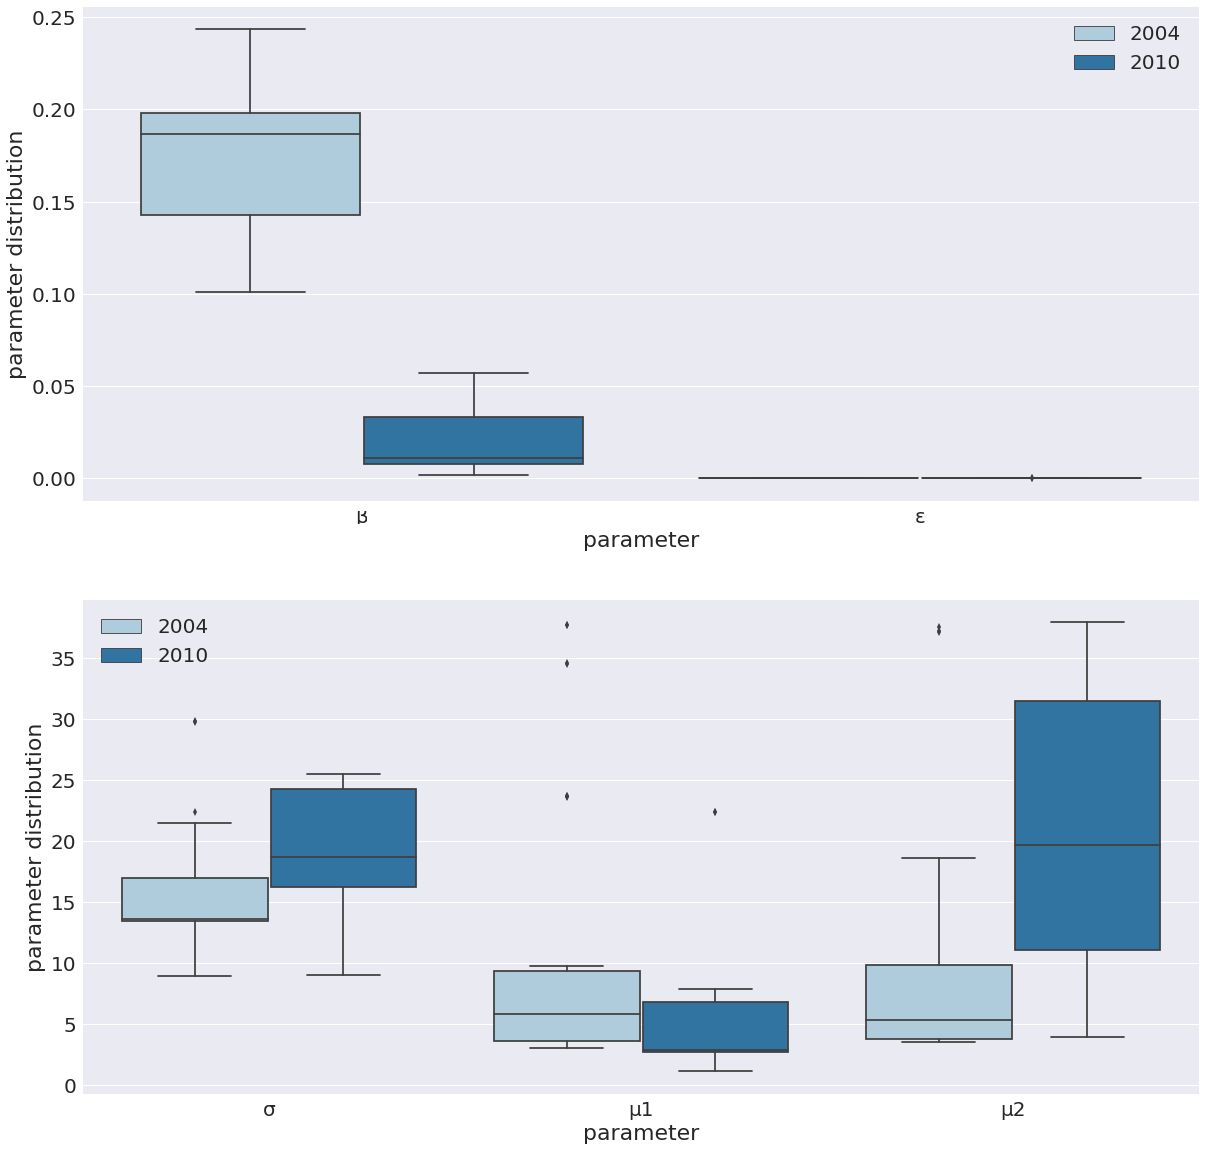

In [13]:
# sns.palplot(sns.color_palette("GnBu_d"))
plt.figure(figsize = (20,20))
sns.set(font_scale=2)  # crazy big
cmap = sns.color_palette("GnBu_d")
plt.subplot(2,1, 1)
sns.boxplot(x = 'parameter', y = 'parameter distribution', data = df.loc[df['parameter'].isin(['β','ɛ'])], hue = 'case' , palette = 'Paired')
plt.legend(fontsize = 20)


plt.subplot(2,1,2)
sns.boxplot(x = 'parameter', y = 'parameter distribution', data = df.loc[df['parameter'].isin(['σ', 'μ1', 'μ2'])], hue = 'case' , palette = 'Paired')
plt.legend(fontsize = 20)

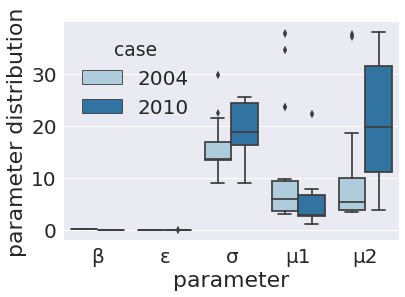

In [14]:
sns.boxplot(x = 'parameter', y = 'parameter distribution', data = df, hue = 'case' , palette = 'Paired')